# UNIT 2  GROUP WORK - Data Engineering for Health Data Science

#### Team Boolean members:
- Sol Andres
- Peter Edwards
- Kamal Masarweh
    

<a id="top"></a>

<b>Table of contents</b><br>

PART 1 -  [QUANTITIES](#quantity)

PART 2 - [COSTS](#cost)

PART 3 - [GEOGRAPHICAL DATA](#geographical)

In [10]:
# Settings

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # for creating graphs from 2 series

# script for changeing figure size & dpi
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True) ##To propagate the size change to an existing GUI window, add forward=True:
fig.set_dpi(100)

# read the CSV file
epd_20 = pd.read_csv('EPD_202004.csv')
epd_21 = pd.read_csv('EPD_202104.csv')

#epd_21


<Figure size 1000x400 with 0 Axes>

<a id="quantity"></a>
# Part 1 : QUANTITIES

In [13]:
# 2021 prescriptions overall quantity

drug_quantity_21 = epd_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_sum_21 = drug_quantity_21.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["TOTAL_QUANTITY"].sum() #as_index needed to keep dataframe stucture
drug_quantity_sum_21

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Absorbent Cottons,500.0
1,Acamprosate calcium,30802.0
2,Acarbose,1525.0
3,Acebutolol hydrochloride,350.0
4,Aceclofenac,636.0
...,...,...
1026,Zolpidem tartrate,9867.0
1027,Zonisamide,16040.0
1028,Zopiclone,77351.0
1029,Zuclopenthixol decanoate,250.0


In [17]:
# 2021 prescriptions  - 20 most prescribed 
drug_quantity_top_21=drug_quantity_sum_21.sort_values(by=['TOTAL_QUANTITY'],ascending=False)
drug_quantity_top_21.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
329,Enteral nutrition,32284423.0
318,Emollients,6234276.0
712,Other emollient preparations,6186205.0
715,Other food for special diet preparations,4283227.0
29,Alginic acid compound preparations,2684629.0
716,Other food preparations,2413741.0
745,Paracetamol,2380118.0
211,Co-codamol (Codeine phosphate/paracetamol),1983418.0
609,Metformin hydrochloride,1911197.0
520,Lactulose,1550275.0


In [15]:
# 2020 prescriptions overall quantity

drug_quantity_20 = epd_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_sum_20 = drug_quantity_20.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["TOTAL_QUANTITY"].sum()
drug_quantity_sum_20

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Absorbent Cottons,1100.0
1,Acamprosate calcium,29523.0
2,Acarbose,1150.0
3,Acebutolol hydrochloride,238.0
4,Aceclofenac,456.0
...,...,...
1037,Zolpidem tartrate,10629.0
1038,Zonisamide,16119.0
1039,Zopiclone,82740.0
1040,Zuclopenthixol decanoate,140.0


In [18]:
# 2020 prescriptions  - 20 most prescribed 

drug_quantity_top_20=drug_quantity_sum_20.sort_values(by=['TOTAL_QUANTITY'],ascending=False)
drug_quantity_top_20.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
338,Enteral nutrition,31437130.0
726,Other emollient preparations,5804050.0
329,Emollients,5604025.0
729,Other food for special diet preparations,4451878.0
758,Paracetamol,2593232.0
730,Other food preparations,2501411.5
27,Alginic acid compound preparations,2447949.0
215,Co-codamol (Codeine phosphate/paracetamol),1947588.0
624,Metformin hydrochloride,1834551.0
533,Lactulose,1556080.0


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

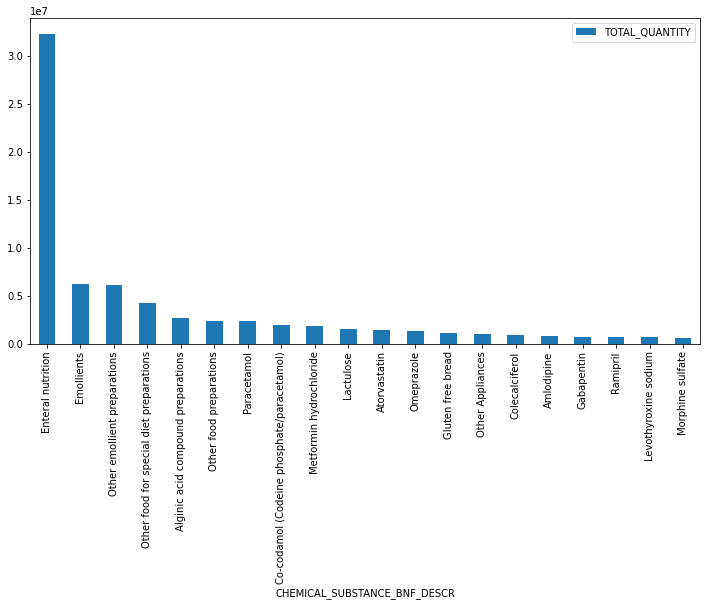

In [19]:
# Separate bar chart for most prescribed drugs 2021

drug_21_main=drug_quantity_top_21.head(20)
drug_21_main.plot.bar(x='CHEMICAL_SUBSTANCE_BNF_DESCR',y='TOTAL_QUANTITY',figsize=(12,6))

<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

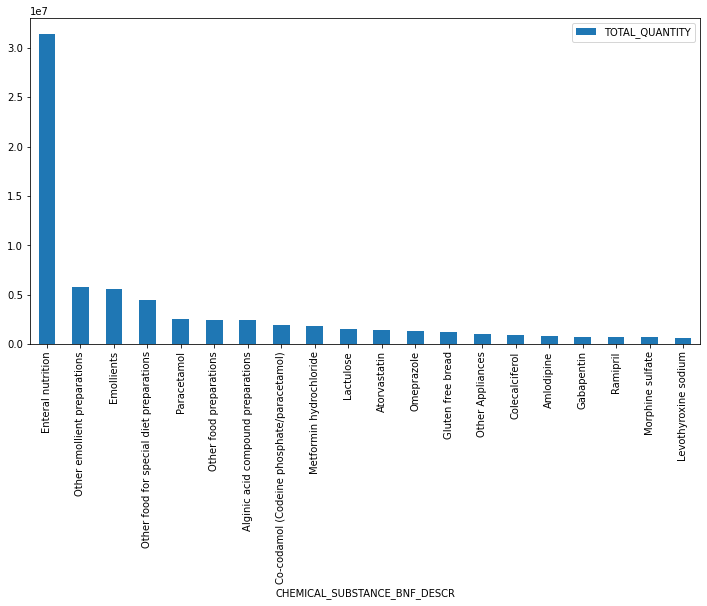

In [7]:
# Separate bar chart for most prescribed drugs 2020

drug_20_main=drug_quantity_top_20.head(20)
drug_20_main.plot.bar(x='CHEMICAL_SUBSTANCE_BNF_DESCR',y='TOTAL_QUANTITY',figsize=(12,6))

In [26]:
#drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(20) #values_reshape used to convert series to list for using in combined bar chart

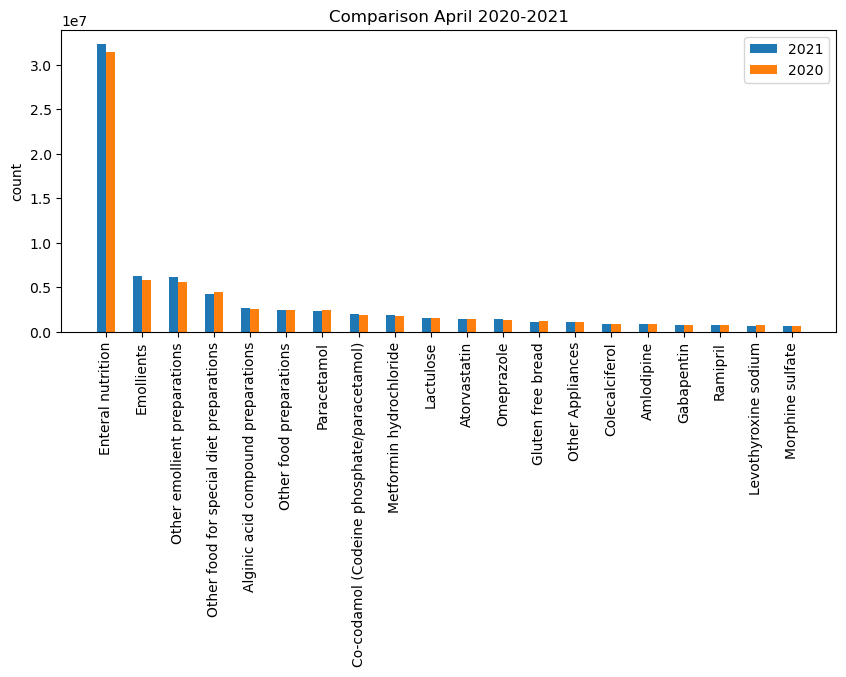

In [160]:
# comparison bar chart between two years - prescriptions

prescriptions_count = len(drug_21_main) 
x = np.arange(prescriptions_count)  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_21_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2021') ## turn series to list
rects2 = ax.bar(x + width/2, drug_20_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2020')

#text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x)

x_axis = pd.Series(drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(prescriptions_count)) 

ax.set_xticklabels(x_axis, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)


In [162]:
drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(prescriptions_count)

array(['Enteral nutrition', 'Emollients', 'Other emollient preparations',
       'Other food for special diet preparations',
       'Alginic acid compound preparations', 'Other food preparations',
       'Paracetamol', 'Co-codamol (Codeine phosphate/paracetamol)',
       'Metformin hydrochloride', 'Lactulose', 'Atorvastatin',
       'Omeprazole', 'Gluten free bread', 'Other Appliances',
       'Colecalciferol', 'Amlodipine', 'Gabapentin', 'Ramipril',
       'Levothyroxine sodium', 'Morphine sulfate'], dtype=object)

In [46]:
# METHOD1 2021

# 2021 prescriptions by group (BNF_CHAPTER_PLUS_CODE)

drug_group_21 = epd_21["BNF_CHAPTER_PLUS_CODE"].value_counts()

# 2021 prescriptions - 10 most prescribed GROUPS
group_21_main = drug_group_21.head(10)
group_21_main

04: Central Nervous System                                 56409
02: Cardiovascular System                                  32331
06: Endocrine System                                       21260
01: Gastro-Intestinal System                               16416
09: Nutrition and Blood                                    16260
13: Skin                                                   13853
03: Respiratory System                                     12776
21: Appliances                                             11886
05: Infections                                              8513
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7630
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [45]:
# METHOD2 2021

# 2021 prescriptions by group - including calculation by TOTAL QUANTITY

drug_group_21 = epd_21[["BNF_CHAPTER_PLUS_CODE","TOTAL_QUANTITY"]]
drug_group_sum_21 = drug_group_21.groupby('BNF_CHAPTER_PLUS_CODE', as_index=False)["TOTAL_QUANTITY"].sum() 

# 2021 prescriptions - 10 most prescribed GROUPS by TOTAL QUANTITY

group_21_sum_main = drug_group_sum_21.head(10)
group_21_sum_main


,BNF_CHAPTER_PLUS_CODE,TOTAL_QUANTITY
0,01: Gastro-Intestinal System,8668543.0
1,02: Cardiovascular System,8566234.0
2,03: Respiratory System,1685408.0
3,04: Central Nervous System,13651930.4
4,05: Infections,1078985.5
5,06: Endocrine System,4724934.0
6,"07: Obstetrics, Gynaecology and Urinary-Tract ...",957917.0
7,08: Malignant Disease and Immunosuppression,101576.0
8,09: Nutrition and Blood,43517231.0
9,10: Musculoskeletal and Joint Diseases,2066979.0


In [47]:
# METHOD1 2020

# 2020 prescriptions by group (BNF_CHAPTER_PLUS_CODE)

drug_group_20 = epd_20["BNF_CHAPTER_PLUS_CODE"].value_counts()

#2020 prescriptions - 10 most prescribed GROUPS
group_20_main = drug_group_20.head(10)
group_20_main

04: Central Nervous System                                 54743
02: Cardiovascular System                                  32049
06: Endocrine System                                       20310
01: Gastro-Intestinal System                               15939
09: Nutrition and Blood                                    15866
03: Respiratory System                                     13242
13: Skin                                                   13058
21: Appliances                                             10852
05: Infections                                              8995
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7405
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [48]:
# METHOD2 2020

# 2020 prescriptions by group - including calculation by TOTAL QUANTITY

drug_group_20 = epd_20[["BNF_CHAPTER_PLUS_CODE","TOTAL_QUANTITY"]]
drug_group_sum_20 = drug_group_20.groupby('BNF_CHAPTER_PLUS_CODE', as_index=False)["TOTAL_QUANTITY"].sum() 
drug_group_sum_20

# 2020 prescriptions - 10 most prescribed GROUPS by TOTAL QUANTITY

group_20_sum_main = drug_group_sum_20.head(10)
group_21_sum_main


,BNF_CHAPTER_PLUS_CODE,TOTAL_QUANTITY
0,01: Gastro-Intestinal System,8668543.0
1,02: Cardiovascular System,8566234.0
2,03: Respiratory System,1685408.0
3,04: Central Nervous System,13651930.4
4,05: Infections,1078985.5
5,06: Endocrine System,4724934.0
6,"07: Obstetrics, Gynaecology and Urinary-Tract ...",957917.0
7,08: Malignant Disease and Immunosuppression,101576.0
8,09: Nutrition and Blood,43517231.0
9,10: Musculoskeletal and Joint Diseases,2066979.0


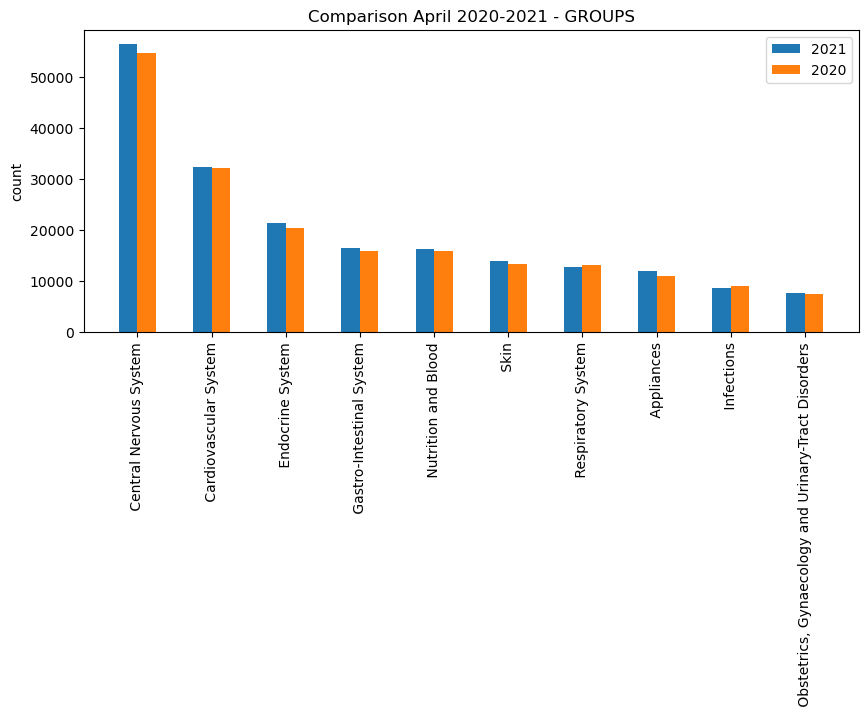

In [87]:
# comparison bar chart between two years - prescriptions as GROUPS (BNF_CHAPTER_PLUS_COD) - METHOD1

x = np.arange(len(group_21_main.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_21_main , width, label='2021')
rects2 = ax.bar(x + width/2, group_20_main , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - GROUPS')
ax.set_xticks(x)

second_word = pd.Series(group_21_main.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

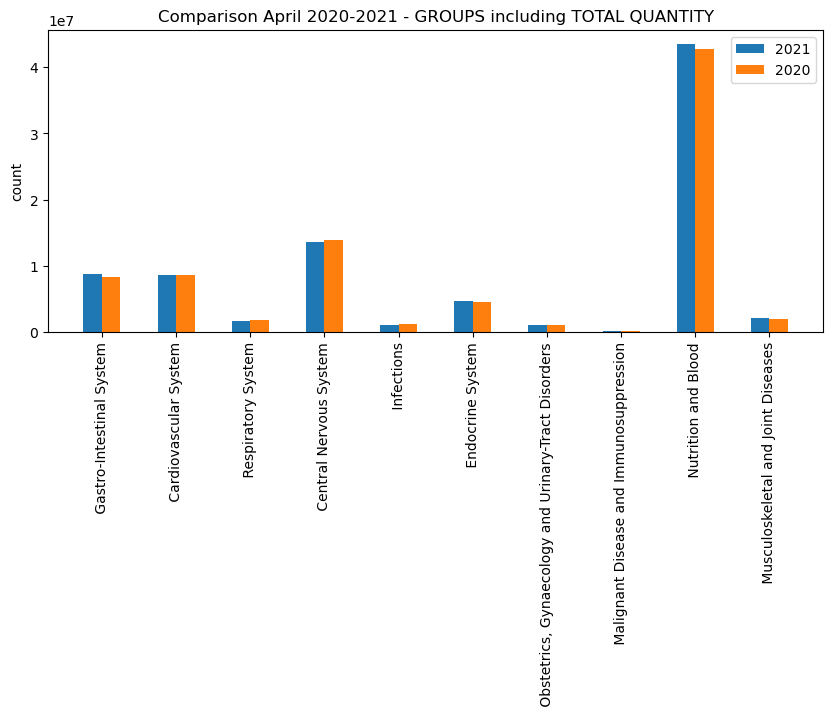

In [86]:
# comparison bar chart between two years - prescriptions as GROUPS including calculation by TOTAL QUANTITY - METHOD 2

prescriptions_count = len(group_21_sum_main) 
x = np.arange(prescriptions_count)  # the label locations
width = 0.25  # the width of the bars

#x = np.arange(len(group_21_sum_main.keys()))  # the label locations

_ , ax = plt.subplots()
#rects1 = ax.bar(x - width/2, group_21_sum_main , width, label='2021')
#rects2 = ax.bar(x + width/2, group_20_sum_main , width, label='2020')

rects1 = ax.bar(x - width/2, group_21_sum_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2021')
rects2 = ax.bar(x + width/2, group_20_sum_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - GROUPS including TOTAL QUANTITY')
ax.set_xticks(x)

second_word = pd.Series(group_21_sum_main[["BNF_CHAPTER_PLUS_CODE"]].values.reshape(prescriptions_count)) 
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

<a id="cost"></a>

## PART 2 - COSTS

In [149]:
## COSTS OF PRESCRIPTIONS

# 2021 total cost of presciptions
overall_cost_21 = epd_21['ACTUAL_COST'].sum()
# 2020 total cost of presciptions
overall_cost_20 = epd_20['ACTUAL_COST'].sum()


In [89]:
# 2021 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_21 = epd_21.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_21=group_cost_21.head(15)
group_cost_main_21

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                33.155450
02: Cardiovascular System                                   31.427788
03: Respiratory System                                      73.143055
04: Central Nervous System                                  25.938845
05: Infections                                              20.338859
06: Endocrine System                                        65.187693
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     26.182677
08: Malignant Disease and Immunosuppression                 75.989270
09: Nutrition and Blood                                     45.553604
10: Musculoskeletal and Joint Diseases                      20.790925
11: Eye                                                     21.714533
12: Ear, Nose and Oropharynx                                28.464686
13: Skin                                                    24.216060
14: Immunological Products and Vaccines                    260.73079

In [90]:
# 2020 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_20 = epd_20.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_20=group_cost_20.head(15)
group_cost_main_20

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                               29.393818
02: Cardiovascular System                                  28.543309
03: Respiratory System                                     73.115024
04: Central Nervous System                                 27.749504
05: Infections                                             20.131416
06: Endocrine System                                       64.654654
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    26.282968
08: Malignant Disease and Immunosuppression                70.478257
09: Nutrition and Blood                                    45.682255
10: Musculoskeletal and Joint Diseases                     20.963553
11: Eye                                                    21.869329
12: Ear, Nose and Oropharynx                               28.845989
13: Skin                                                   23.395512
14: Immunological Products and Vaccines                    53.750129
15: Anaesthe

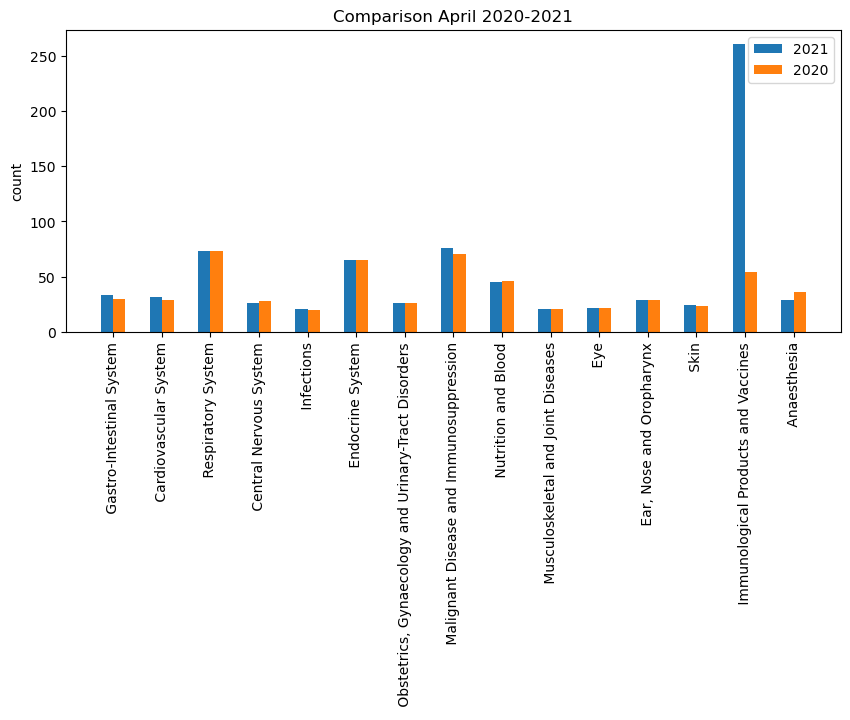

In [91]:
# comparison bar chart between two years - prescription costs of main 15 GROUPS (BNF_CHAPTER_PLUS_COD)

x = np.arange(len(group_cost_main_21.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_cost_main_21 , width, label='2021')
rects2 = ax.bar(x + width/2, group_cost_main_20 , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x,)
             
second_word = pd.Series(group_cost_main_21.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)
    
ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

In [175]:
# trying to analyze the difference in cost in "14: Immunological Products and Vaccines"


In [ ]:


#METHOD 1 - using MEAN function



In [176]:
vaccines_cost_21_mean=vaccines_cost_21.groupby(["CHEMICAL_SUBSTANCE_BNF_DESCR"]).mean()
vaccines_cost_21_mean

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Diphtheria,9.908025
Hepatitis A,28.414159
Hepatitis A/hepatitis B,108.598615
Hepatitis A/typhoid vaccine,66.614970
Hepatitis B,38.813369
"Human papillomavirus (Type 6,11,16,18)",443.121835
Influenza,1468.270725
Meningococcal A + C + W135 + Y vaccine,55.885045
Pneumococcal,63.309258


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

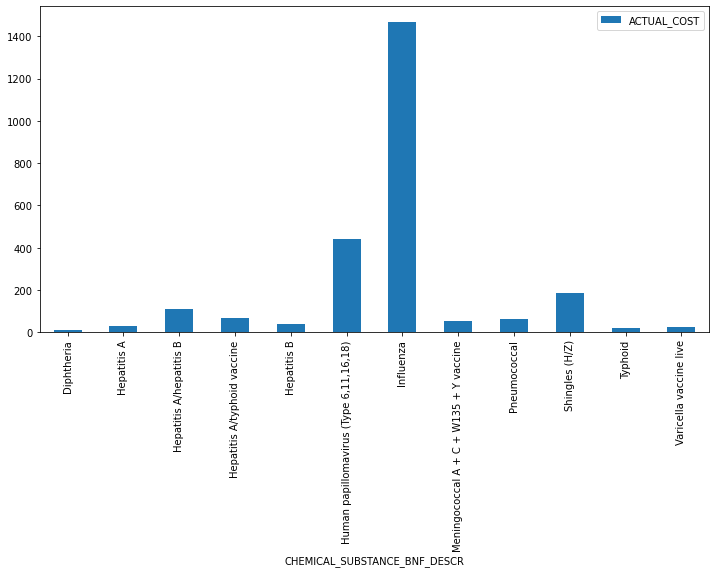

In [177]:
vaccines_cost_21_mean.plot.bar(figsize=(12,6))

In [178]:
vaccines_20 = epd_20.loc[epd_20["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']

vaccines_cost_20 = vaccines_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]

In [179]:
vaccines_cost_20_mean=vaccines_cost_20.groupby(["CHEMICAL_SUBSTANCE_BNF_DESCR"]).mean()
vaccines_cost_20_mean

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Diphtheria,15.319871
Hepatitis A,96.773728
Hepatitis A/hepatitis B,38.652000
Hepatitis A/typhoid vaccine,138.507648
Hepatitis B,20.729385
Influenza,94.380929
"Measles, mumps and rubella vaccine",7.126800
Meningococcal A + C + W135 + Y vaccine,27.887450
Pneumococcal,48.762932


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

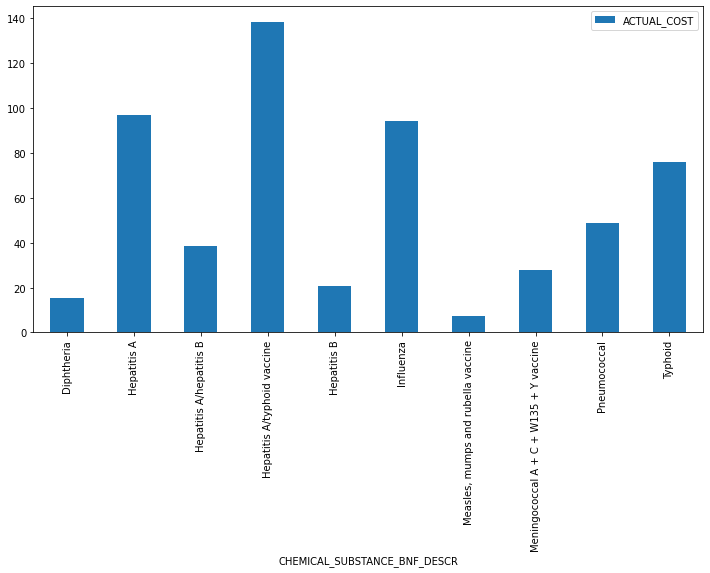

In [180]:
vaccines_cost_20_mean.plot.bar(figsize=(12,6))

In [ ]:


# METHOD 2 - using sum of ACTUAL_COST calculation



In [182]:
# 2021 vaccines SUM costs

vaccines_21 = epd_21.loc[epd_21["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']
vaccines_cost_21=vaccines_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_sum_21 = vaccines_cost_21.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["ACTUAL_COST"].sum()

# 2021 vaccines - 20 highest cost 
vaccines_cost_top_21=vaccines_cost_sum_21.sort_values(by=['ACTUAL_COST'],ascending=False)
vaccines_cost_top_21.head(20)


,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
6,Influenza,27897.14378
8,Pneumococcal,2405.75182
4,Hepatitis B,1397.28130
5,"Human papillomavirus (Type 6,11,16,18)",886.24367
9,Shingles (H/Z),372.44273
1,Hepatitis A,312.55575
2,Hepatitis A/hepatitis B,217.19723
7,Meningococcal A + C + W135 + Y vaccine,111.77009
0,Diphtheria,108.98827
10,Typhoid,93.55157


In [181]:
# 2020 vaccines SUM costs

vaccines_20 = epd_20.loc[epd_20["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']
vaccines_cost_20=vaccines_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_sum_20 = vaccines_cost_20.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["ACTUAL_COST"].sum()

# 202 vaccines - 20 highest cost
vaccines_cost_top_20=vaccines_cost_sum_20.sort_values(by=['ACTUAL_COST'],ascending=False)
vaccines_cost_top_20.head(20)


,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
5,Influenza,1698.85673
8,Pneumococcal,1657.93970
1,Hepatitis A,1258.05847
3,Hepatitis A/typhoid vaccine,831.04589
9,Typhoid,684.69258
4,Hepatitis B,684.06972
0,Diphtheria,260.43781
2,Hepatitis A/hepatitis B,38.65200
7,Meningococcal A + C + W135 + Y vaccine,27.88745
6,"Measles, mumps and rubella vaccine",7.12680


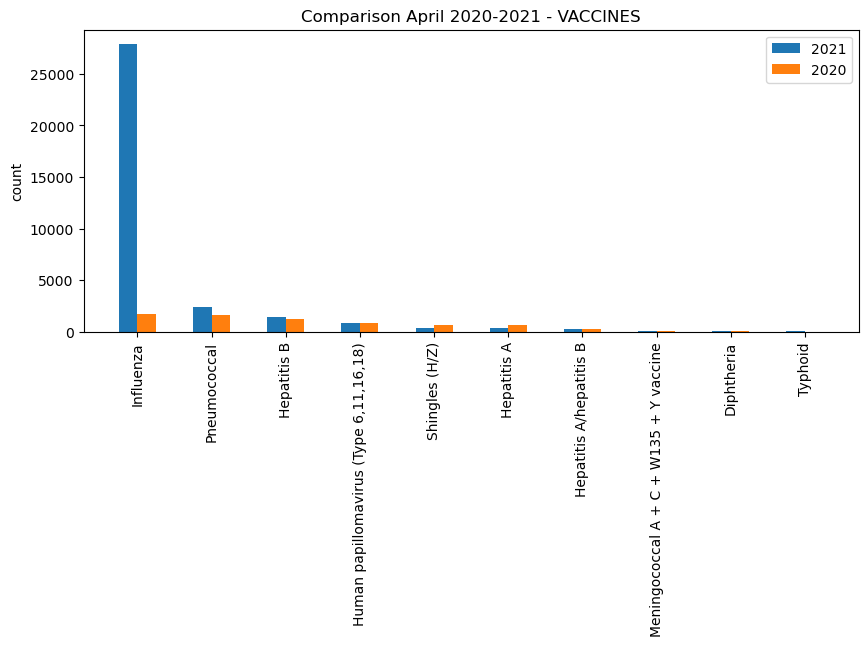

In [189]:
# comparison bar chart between two years - VACCINES COSTS

vaccines_21_main = vaccines_cost_top_21.head(10)
vaccines_20_main = vaccines_cost_top_20.head(10)

vaccines_count = len(vaccines_21_main)
x = np.arange(vaccines_count)  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, vaccines_21_main[["ACTUAL_COST"]].values.reshape(vaccines_count), width, label='2021')
rects2 = ax.bar(x + width/2, vaccines_20_main[["ACTUAL_COST"]].values.reshape(vaccines_count), width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - VACCINES')
ax.set_xticks(x)

#second_word = pd.Series(group_21_sum_main[["BNF_CHAPTER_PLUS_CODE"]].values.reshape(prescriptions_count)) 
#second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

#x_axis = pd.Series(group_cost_main_21.keys().tolist())
#values.reshape(prescriptions_count)) 
x_axis= pd.Series(vaccines_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(vaccines_count)) 
ax.set_xticklabels(x_axis, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)


<a id="geographical"></a>

## PART 3 - GEOGRAPHICAL DATA

In [1]:
# Unit 2 Section 4 assessment
# How to read csv file
# import the pandas library as pd for short hand
import pandas as pd
# read the CSV file
epd_20 = pd.read_csv('/Users/mariasolandres/project/EPD_202004.csv')
epd_21 = pd.read_csv('/Users/mariasolandres/project/EPD_202104 (1).csv')
# displaying the contents of the CSV file - this will take a few seconds.
print(epd_20)
#print(epd_21)
# check that a data frame has been created for each epd dataset
#type(epd_20)
#type(epd_21)

# read in the second EDP file as above
# you are now ready to explore the data


        YEAR_MONTH REGIONAL_OFFICE_NAME REGIONAL_OFFICE_CODE  \
0           202004           NORTH WEST                  Y62   
1           202004           NORTH WEST                  Y62   
2           202004           NORTH WEST                  Y62   
3           202004           NORTH WEST                  Y62   
4           202004           NORTH WEST                  Y62   
...            ...                  ...                  ...   
216314      202004           NORTH WEST                  Y62   
216315      202004           NORTH WEST                  Y62   
216316      202004           NORTH WEST                  Y62   
216317      202004           NORTH WEST                  Y62   
216318      202004           NORTH WEST                  Y62   

                                      STP_NAME STP_CODE        PCO_NAME  \
0       GREATER MANCHESTER HSC PARTNERSHIP STP      QOP  MANCHESTER CCG   
1       GREATER MANCHESTER HSC PARTNERSHIP STP      QOP  MANCHESTER CCG   
2     

In [2]:
practices = epd_20["PRACTICE_NAME"]
practices.describe()

count                        216319
unique                          114
top       BENCHILL MEDICAL PRACTICE
freq                           3981
Name: PRACTICE_NAME, dtype: object

In [3]:
practices21 = epd_21["PRACTICE_NAME"]
practices21.describe()

count                        221428
unique                          116
top       BENCHILL MEDICAL PRACTICE
freq                           4231
Name: PRACTICE_NAME, dtype: object

In [4]:
Practices_dataframe = pd.DataFrame(
    {
        "Month": [
            "April",
            "April",
        ],
        "Year": [2020, 2021],
        "Number of Practices": [114, 116],
    }
)